In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from sklearn.metrics import accuracy_score

Num GPUs Available:  2


In [42]:
data_dir = '/kaggle/input/russian-road-signs-categories-dataset'
train_path = '/kaggle/input/russian-road-signs-categories-dataset/train'
test_path = '/kaggle/input/russian-road-signs-categories-dataset/test'

height = 50
width = 50


In [43]:
batch_size = 150
seed = 42


In [44]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 44800 images belonging to 8 classes.
Found 11200 images belonging to 8 classes.


In [45]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(8, activation='softmax')
])

In [46]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 16)        1216      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 42, 42, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 21, 21, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

In [47]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [48]:
cnn = model.fit(train_dataset,
                steps_per_epoch=len(train_dataset),
                epochs=epochs,
                validation_data=test_dataset,
                validation_steps=len(test_dataset))


Epoch 1/15
299/299 [==============================] - 188s 627ms/step - loss: 0.2738 - accuracy: 0.9169 - val_loss: 3.2288 - val_accuracy: 0.3706
Epoch 2/15
299/299 [==============================] - 190s 634ms/step - loss: 0.0792 - accuracy: 0.9743 - val_loss: 0.1087 - val_accuracy: 0.9604
Epoch 3/15
299/299 [==============================] - 189s 633ms/step - loss: 0.0430 - accuracy: 0.9859 - val_loss: 0.2463 - val_accuracy: 0.9501
Epoch 4/15
299/299 [==============================] - 187s 626ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.0683 - val_accuracy: 0.9760
Epoch 5/15
299/299 [==============================] - 185s 619ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 6/15
299/299 [==============================] - 185s 619ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 1.5897 - val_accuracy: 0.7246
Epoch 7/15
299/299 [==============================] - 191s 638ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0536 -

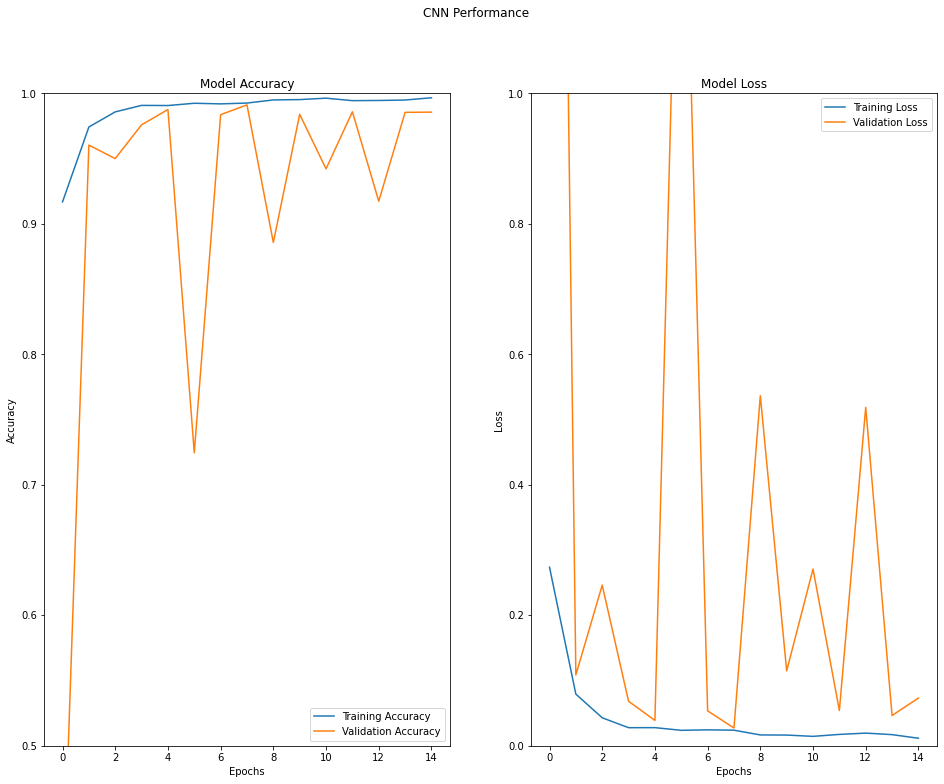

<Figure size 720x504 with 0 Axes>

In [49]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(cnn.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('CNN Performance')
plt.show()

In [50]:
# prediction on single image
from keras.preprocessing import image

val_image = image.load_img('/kaggle/input/russian-road-signs-categories-dataset/test/3/3_7011.png',target_size=(height, width))
val_image = image.img_to_array(val_image)
val_image = np.expand_dims(val_image,axis=0)

In [51]:
result = model.predict(val_image)
result

array([[0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
train_dataset.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7}